<a href="https://colab.research.google.com/github/Bip-Alt/Assignment-3-Testing/blob/main/36106_AT1_11909379_experiment_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [1]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36106"
ASSIGNMENT = "AT1"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

print("###### Install required Python packages ######")
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}


###### Install required Python packages ######

###### Connect to personal Google Drive ######
Mounted at /content/gdrive

###### Setting up folders ######

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT1/data
/content/gdrive/MyDrive/36106/assignment/AT1/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn.feature_selection as fs
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


### 0.d Import Packages

In [7]:
import ipywidgets as widgets
import pandas as pd
import altair as alt

---
## A. Project Description


In [5]:
# @title Student Information
wgt_student_name = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Name:',
    style={'description_width': 'initial'},
    disabled=False
)

wgt_student_id = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Id:',
    style={'description_width': 'initial'},
    disabled=False
)

widgets.HBox([wgt_student_name, wgt_student_id])

In [6]:
# @title Experiment ID

wgt_experiment_id = widgets.BoundedIntText(
    value=0,
    min=0,
    max=3,
    step=1,
    description='Experiment ID:',
    style={'description_width': 'initial'},
    disabled=False
)
wgt_experiment_id

BoundedIntText(value=0, description='Experiment ID:', max=3, style=DescriptionStyle(description_width='initial…

In [7]:
# @title Business Objective

wgt_business_objective = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Business Objective:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_business_objective

Textarea(value='', description='Business Objective:', layout=Layout(height='100%', width='auto'), placeholder=…

---
## B. Experiment Description

In [8]:
# @title Experiment Hypothesis

wgt_experiment_hypothesis = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Hypothesis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_hypothesis

Textarea(value='', description='Experiment Hypothesis:', layout=Layout(height='100%', width='auto'), placehold…

In [9]:

# @title Experiment Expectations

wgt_experiment_expectations = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Expectations:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_expectations

Textarea(value='', description='Experiment Expectations:', layout=Layout(height='100%', width='auto'), placeho…

---
## C. Data Understanding

### C.1   Load Datasets



In [158]:
# Load training data
training_df = pd.read_csv(folder_path / "rental_training.csv")

In [159]:
# Load validation data
validation_df = pd.read_csv(folder_path / "rental_validation.csv")

In [160]:
# Load testing data
testing_df = pd.read_csv(folder_path / "rental_testing.csv")

### C.2 Explore Training Set



In [11]:
training_df.head()

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
0,2022-05-18,2,568.0,1100,Ground out of 2,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,02/,1,Mcdowell Edge,Driveway,Mr.,Robert,Jones,m,(08) 8174 5701,georgelopez@example.org
1,2022-05-13,2,581.0,800,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,667/,6,Lewis Parkway,Viaduct,Mrs.,Lisa,Mcknight,f,(08).5553.7944,robertdorsey@example.net
2,2022-05-16,2,577.0,1000,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,859/,459,Daniel Copse,Meander,NaN,Annette,Lester,u,(03).6394.3934,rodriguezkaren@example.net
3,2022-05-09,2,565.0,850,1 out of 2,Canberra,Unfurnished,Bachelors,1,Contact Owner,Flat 54,482,Young Walkway,Firetrail,Mrs.,Emma,Hill,f,+61836311377,johnsonjeremy@example.com
4,2022-04-29,2,564.0,600,Ground out of 1,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,Unit 75,838,Michael Port,Esplanade,Miss,Ariana,Richardson,f,+61 409 341 340,sbrown@example.net


In [12]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      3434 non-null   object 
 1   number_of_bedrooms   3434 non-null   int64  
 2   rent                 3434 non-null   float64
 3   floor_area           3434 non-null   int64  
 4   level                3434 non-null   object 
 5   suburb               3434 non-null   object 
 6   furnished            3434 non-null   object 
 7   tenancy_preference   3434 non-null   object 
 8   number_of_bathrooms  3434 non-null   int64  
 9   point_of_contact     3434 non-null   object 
 10  secondary_address    3434 non-null   object 
 11  building_number      3434 non-null   int64  
 12  street_name          3434 non-null   object 
 13  street_suffix        3434 non-null   object 
 14  prefix               2274 non-null   object 
 15  first_name           3434 non-null   o

In [13]:
training_df.shape

(3434, 20)

In [14]:
training_df.describe(include ='int64')

,number_of_bedrooms,floor_area,number_of_bathrooms,building_number
count,3434.000000,3434.000000,3434.000000,3434.000000
mean,2.022423,919.708794,1.881188,189.853815
std,0.813388,588.741127,0.850203,284.860733
min,1.000000,20.000000,1.000000,0.000000
25%,1.000000,550.000000,1.000000,7.000000
50%,2.000000,800.000000,2.000000,46.000000
75%,2.000000,1186.000000,2.000000,268.750000
max,6.000000,8000.000000,10.000000,998.000000


In [15]:
training_df.describe(include ='object')

,advertised_date,level,suburb,furnished,tenancy_preference,point_of_contact,secondary_address,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
count,3434,3434,3434,3434,3434,3434,3434,3434,3434,2274,3434,3433,3434,3434,3434
unique,66,334,6,3,3,3,1381,3373,200,5,701,1085,3,3434,3411
top,2022-05-12,1 out of 2,Brisbane,Semi-Furnished,Bachelors/Family,Contact Owner,8/,Michael Run,Retreat,Mr.,Michael,Smith,u,+61 487 589 767,usmith@example.org
freq,149,289,694,1587,2579,2555,54,3,29,789,66,68,1160,1,2


In [16]:
training_df.nunique()

,0
advertised_date,66
number_of_bedrooms,6
rent,122
floor_area,484
level,334
suburb,6
furnished,3
tenancy_preference,3
number_of_bathrooms,8
point_of_contact,3


In [17]:
missing_values_training  = training_df.isnull().sum()  # This returns a Series
missing_columns_training  = missing_values_training [missing_values_training  > 0]

print("Columns with missing values in training data set:")
print(missing_columns_training )

Columns with missing values in training data set:
prefix       1160
last_name       1
dtype: int64


In [18]:
duplicate_values_training  = training_df.duplicated().sum()
duplicate_columns_training  = duplicate_values_training [duplicate_values_training > 0]

print("Columns with duplicate values in  training data set:")
print(duplicate_values_training )

Columns with duplicate values in  training data set:
0


Checking the validity of data among all three datasets

In [161]:
combined_df = pd.concat([training_df, validation_df, testing_df], ignore_index=True)


duplicate_rows = combined_df.duplicated(keep=False)


duplicates_across_sets = combined_df[duplicate_rows]


unique_duplicates = duplicates_across_sets.drop_duplicates()


in_training = training_df.merge(unique_duplicates, how='inner').shape[0]
in_validation = validation_df.merge(unique_duplicates, how='inner').shape[0]
in_testing = testing_df.merge(unique_duplicates, how='inner').shape[0]


print("Duplicates found in each dataset:")
print("Training Set:   ", in_training)
print("Validation Set: ", in_validation)
print("Testing Set:    ", in_testing)

Duplicates found in each dataset:
Training Set:    686
Validation Set:  686
Testing Set:     686


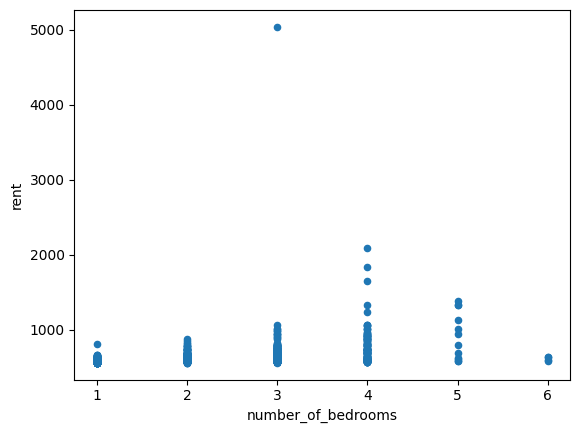

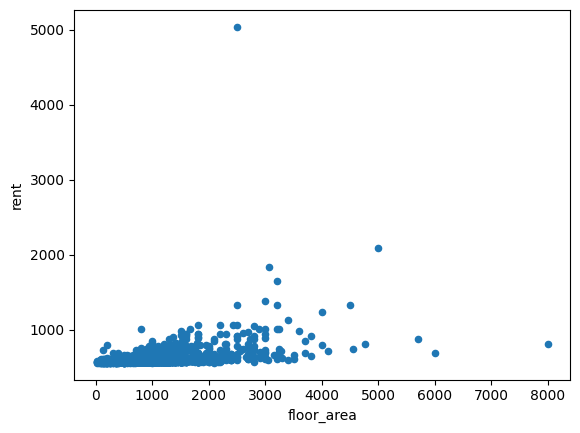

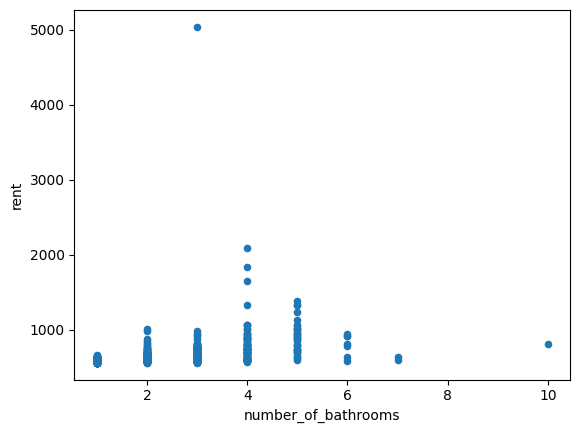

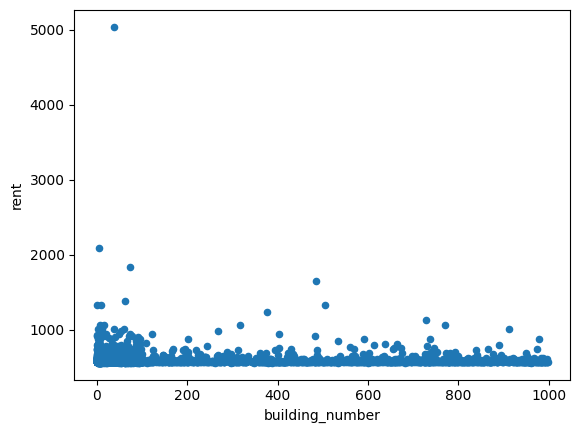

In [162]:
categories = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'building_number']

for col in categories:
  training_df.plot(x=col, y='rent', kind='scatter')



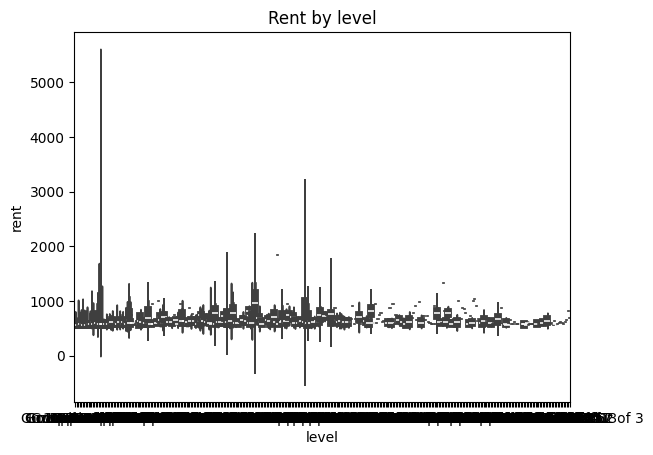

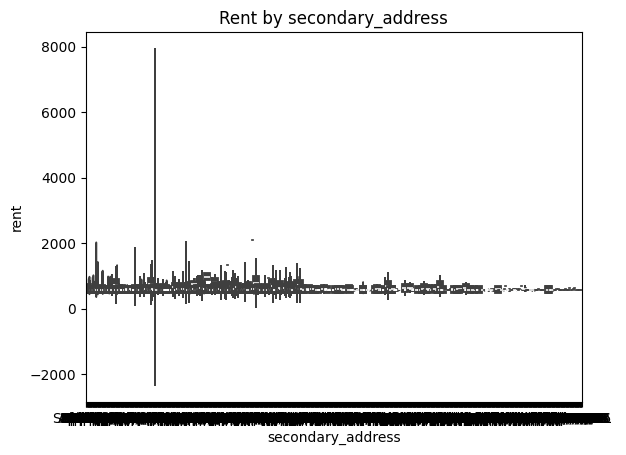

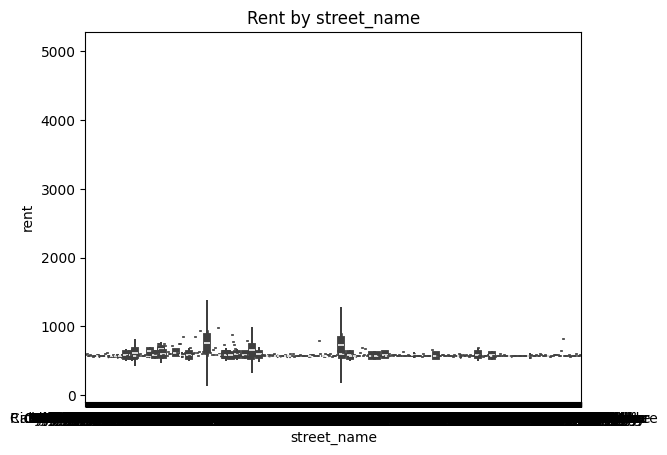

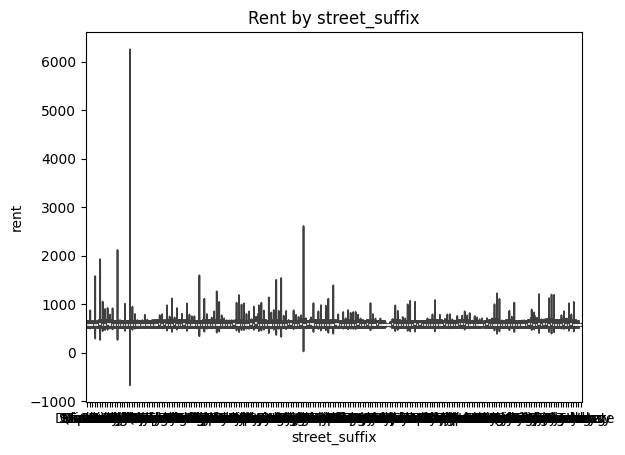

In [23]:
categories =['level', 'secondary_address', 'street_name', 'street_suffix']

for col in categories:
  sns.violinplot(x=col, y='rent', data=training_df)
  plt.title(f'Rent by {col}')
  plt.show()



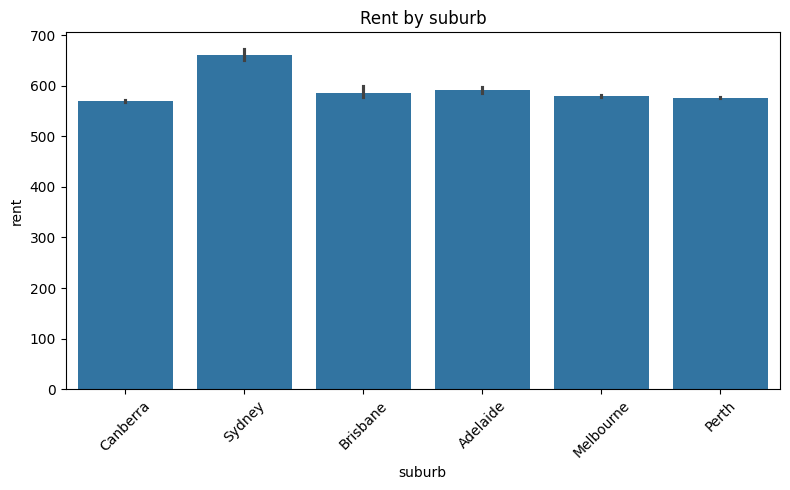

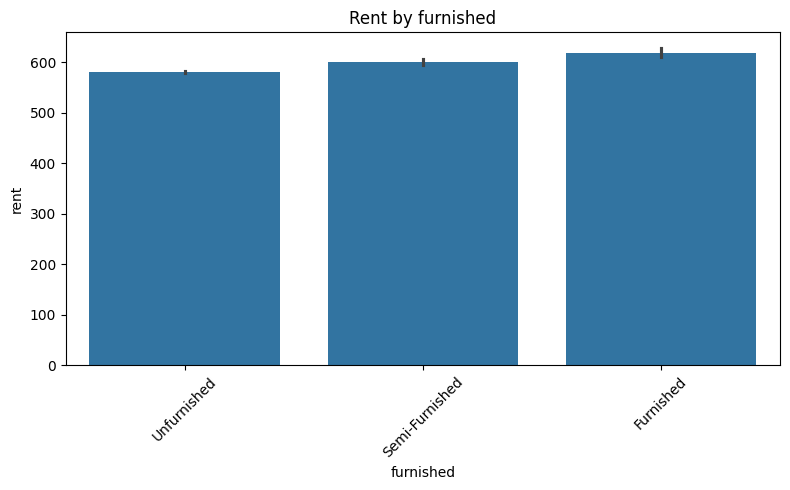

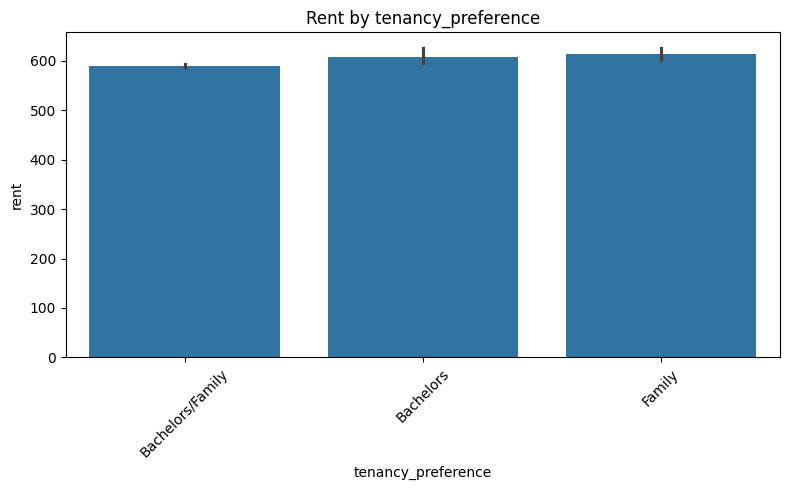

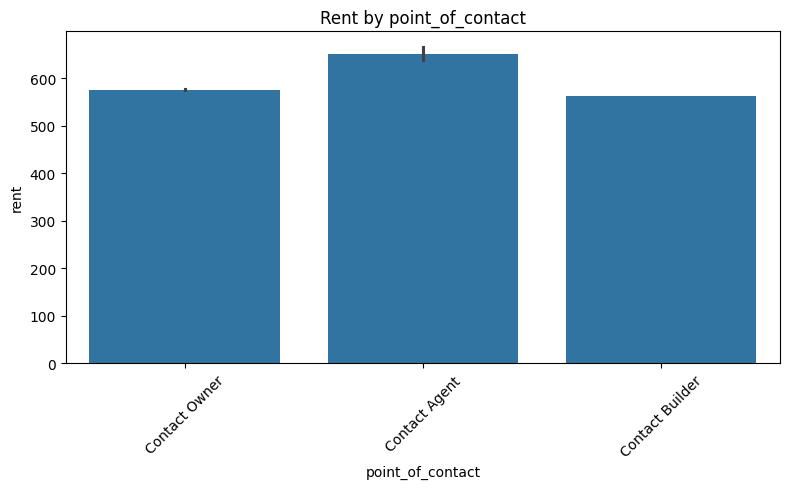

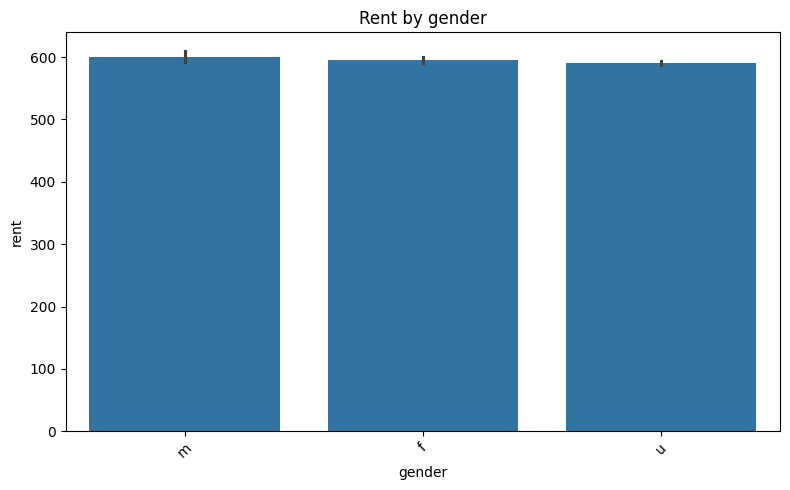

In [21]:
categories = ['suburb','furnished', 'tenancy_preference', 'point_of_contact',  'gender']

for col in categories:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='rent', data=training_df)
    plt.title(f"Rent by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#prefix, fist_name, last_name, phone_number, email is not signficatnt to see the relationship.



Earliest: 2022-04-13 00:00:00
Latest: 2022-06-26 00:00:00

Total unique months: 3

Months in data: <PeriodArray>
['2022-04', '2022-05', '2022-06']
Length: 3, dtype: period[M]

monthly_counts advertised_date
2022-04     228
2022-05    1681
2022-06    1525
Freq: M, Name: count, dtype: int64


<Axes: title={'center': 'Ad count per month'}, xlabel='advertised_date'>

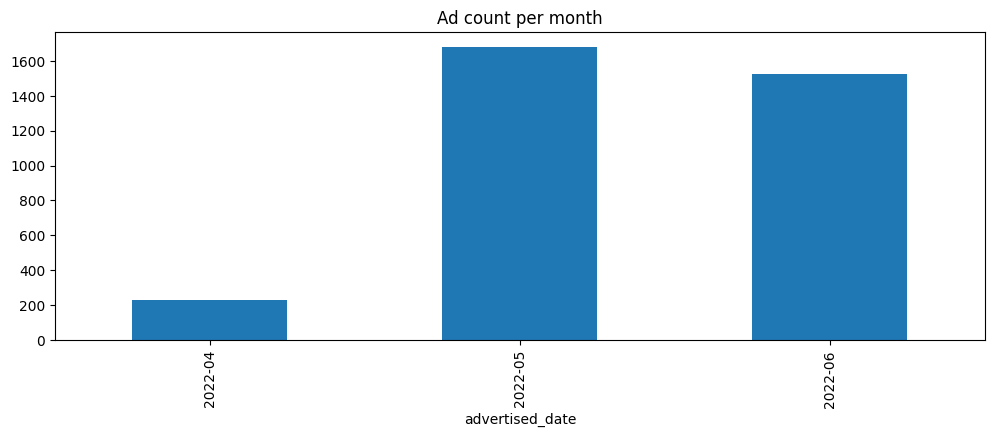

In [22]:
# understanding advertised dates

training_df['advertised_date'] = pd.to_datetime(training_df['advertised_date'])

print("\nEarliest:", training_df['advertised_date'].min())
print("Latest:", training_df['advertised_date'].max())

month_range = training_df['advertised_date'].dt.to_period('M')
total_months = month_range.nunique()
print("\nTotal unique months:", total_months)

unique_months = training_df['advertised_date'].dt.to_period('M').sort_values().unique()
print("\nMonths in data:", unique_months)

monthly_counts = training_df['advertised_date'].dt.to_period('M').value_counts().sort_index()
print('\nmonthly_counts', monthly_counts)

monthly_counts.plot(kind='bar', figsize=(12,4), title="Ad count per month")





In [27]:
# @title Training Set Insights

wgt_eda_training_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Training Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_training_set_insights

Textarea(value='', description='Training Set Insights:', layout=Layout(height='100%', width='auto'), placehold…

### C.3 Explore Validation Set



In [163]:
validation_df.head()

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
0,2022-06-13,2,571.0,560,Ground out of 1,Melbourne,Semi-Furnished,Family,2,Contact Owner,Level 1,1,Baldwin Towers,Footway,NaN,Jay,Glover,u,(03)08687820,brettkennedy@example.net
1,2022-06-04,2,683.0,750,Upper Basement out of 30,Sydney,Unfurnished,Bachelors/Family,2,Contact Agent,1/,31,Cox Fire Track,Lookout,Dr.,Danielle,Tran,f,(03)-0313-6072,dana35@example.net
2,2022-04-29,3,574.0,950,Ground out of 3,Adelaide,Unfurnished,Bachelors/Family,2,Contact Owner,Unit 37,89,Davidson Ground,Part,NaN,Ashley,Pacheco,u,08-9358-6662,justin89@example.org
3,2022-05-18,1,565.0,500,2 out of 2,Sydney,Semi-Furnished,Bachelors,1,Contact Owner,16/,82,Fitzpatrick Key,Heights,NaN,Victoire,Weber,u,(02).9817.8199,pruittmichael@example.net
4,2022-04-28,2,565.0,600,2 out of 3,Brisbane,Semi-Furnished,Bachelors/Family,2,Contact Owner,Flat 64,9,Heidi Access,Mews,Mrs.,Kerry,Koch,f,4124.0210,hansendiana@example.com


In [164]:
validation_df.shape

(1320, 20)

In [165]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1320 non-null   object 
 1   number_of_bedrooms   1320 non-null   int64  
 2   rent                 1320 non-null   float64
 3   floor_area           1320 non-null   int64  
 4   level                1320 non-null   object 
 5   suburb               1320 non-null   object 
 6   furnished            1320 non-null   object 
 7   tenancy_preference   1320 non-null   object 
 8   number_of_bathrooms  1320 non-null   int64  
 9   point_of_contact     1320 non-null   object 
 10  secondary_address    1320 non-null   object 
 11  building_number      1320 non-null   int64  
 12  street_name          1320 non-null   object 
 13  street_suffix        1320 non-null   object 
 14  prefix               855 non-null    object 
 15  first_name           1320 non-null   o

In [169]:
validation_df_filtered = pd.concat([validation_df, unique_duplicates, unique_duplicates]).drop_duplicates(keep=False)
print('shape:', validation_df_filtered.shape)

#Checking to see if all the duplicates are removed
before = validation_df.shape[0]
after = validation_df_filtered.shape[0]
print("\nRows removed:", before - after)


shape: (634, 20)

Rows removed: 0


In [170]:
validation_df = validation_df_filtered.copy() # Overwrite the original datasets with filtered ones
print('shape:', validation_df.shape)

shape: (634, 20)


In [28]:
validation_df.head()

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
686,2022-07-04,2,568.0,800,1 out of 2,Canberra,Unfurnished,Bachelors/Family,1,Contact Owner,3/,744,Ayers Grange,Concourse,Mr.,John,Williams,m,+61811909399,eric01@example.com
687,2022-07-02,2,565.0,650,1 out of 2,Canberra,Unfurnished,Family,1,Contact Owner,074/,94,Michael Cutting,Crest,NaN,Michael,Perez,u,0485 694 019,rachelarroyo@example.net
688,2022-06-29,2,562.0,500,Ground out of 2,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,Apt. 645,8,Barrett Roadway,Plateau,Mr.,Brandon,Roach,m,+61 3 1586 8325,mcconnellmichael@example.net
689,2022-06-29,2,564.0,630,Ground out of 1,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,4/,4,Nielsen Broadway,Alley,Dr.,Vincent,Lucas,m,+61 437 001 403,morganmartha@example.com
690,2022-07-02,2,571.0,650,Ground out of 1,Canberra,Unfurnished,Family,2,Contact Owner,Level 6,31,Hansen Key,Colonnade,Dr.,Heather,Montoya,f,0443-504-292,zgonzalez@example.com


In [168]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 686 to 1319
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      634 non-null    object 
 1   number_of_bedrooms   634 non-null    int64  
 2   rent                 634 non-null    float64
 3   floor_area           634 non-null    int64  
 4   level                634 non-null    object 
 5   suburb               634 non-null    object 
 6   furnished            634 non-null    object 
 7   tenancy_preference   634 non-null    object 
 8   number_of_bathrooms  634 non-null    int64  
 9   point_of_contact     634 non-null    object 
 10  secondary_address    634 non-null    object 
 11  building_number      634 non-null    int64  
 12  street_name          634 non-null    object 
 13  street_suffix        634 non-null    object 
 14  prefix               412 non-null    object 
 15  first_name           634 non-null    objec

In [30]:
validation_df.describe(include ='int64')

,number_of_bedrooms,floor_area,number_of_bathrooms,building_number
count,634.000000,634.000000,634.000000,634.000000
mean,2.149842,995.405363,2.031546,195.152997
std,0.840113,687.035777,0.898805,283.806974
min,1.000000,10.000000,1.000000,0.000000
25%,2.000000,600.000000,1.000000,6.000000
50%,2.000000,850.000000,2.000000,52.000000
75%,3.000000,1200.000000,2.000000,289.750000
max,6.000000,4800.000000,7.000000,981.000000


In [31]:
validation_df.describe(include ='object')

,advertised_date,level,suburb,furnished,tenancy_preference,point_of_contact,secondary_address,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
count,634,634,634,634,634,634,634,634,634,412,634,633,634,634,634
unique,9,133,6,3,3,2,409,632,187,5,306,417,3,634,634
top,2022-07-04,1 out of 2,Sydney,Semi-Furnished,Bachelors/Family,Contact Owner,3/,Smith Esplanade,Lower,Dr.,John,Johnson,u,8233 8936,kelli49@example.com
freq,110,58,130,279,429,407,12,2,9,144,14,11,222,1,1


In [32]:
validation_df.nunique()

,0
advertised_date,9
number_of_bedrooms,6
rent,86
floor_area,173
level,133
suburb,6
furnished,3
tenancy_preference,3
number_of_bathrooms,7
point_of_contact,2


In [171]:
missing_values = validation_df.isnull().sum()  # This returns a Series
missing_columns = missing_values[missing_values> 0]


print("Columns with filtereded missing validation values:")
print(missing_columns)


Columns with filtereded missing validation values:
prefix       222
last_name      1
dtype: int64


In [172]:
duplicate_values_validation = validation_df.duplicated().sum()
duplicate_columns_validation  = duplicate_values_validation [duplicate_values_validation > 0]

print("Columns with duplicate values in filtereded validation data set:")
print(duplicate_values_validation )

Columns with duplicate values in filtereded validation data set:
0


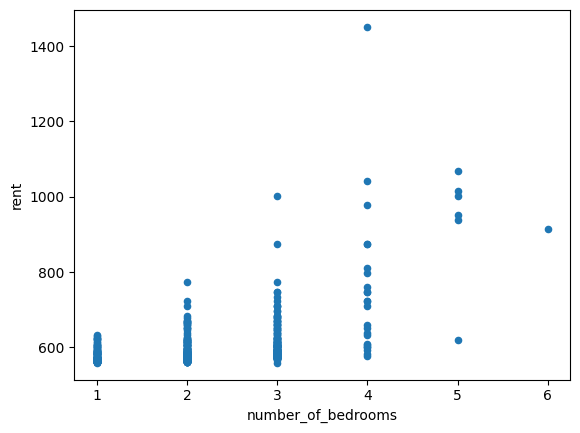

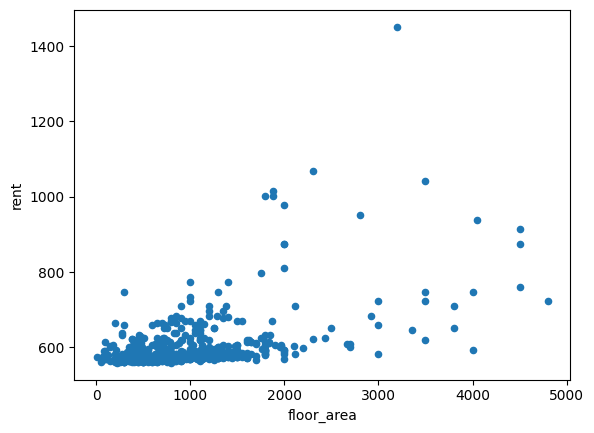

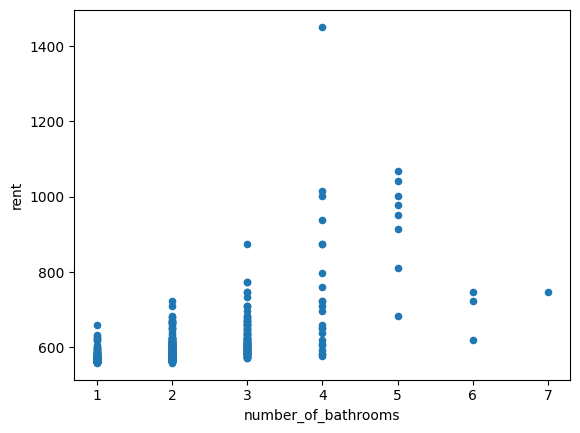

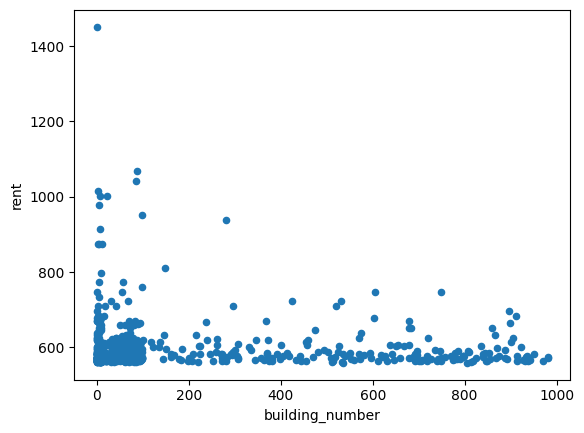

In [173]:
categories = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'building_number']
for col in categories:
  validation_df.plot(x=col, y='rent', kind='scatter')

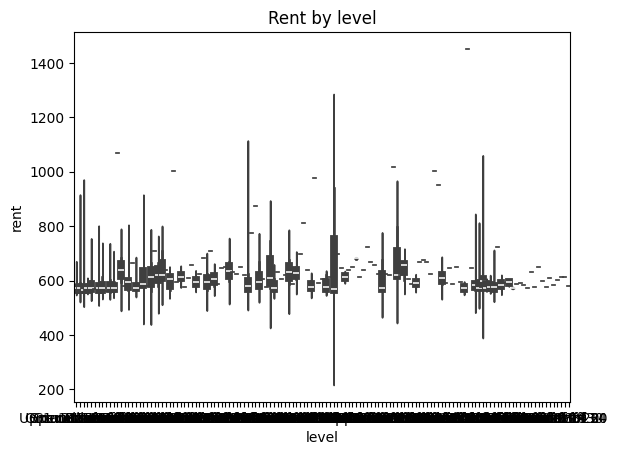

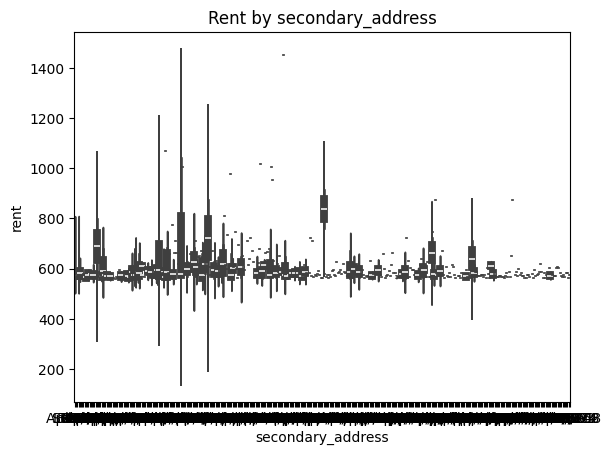

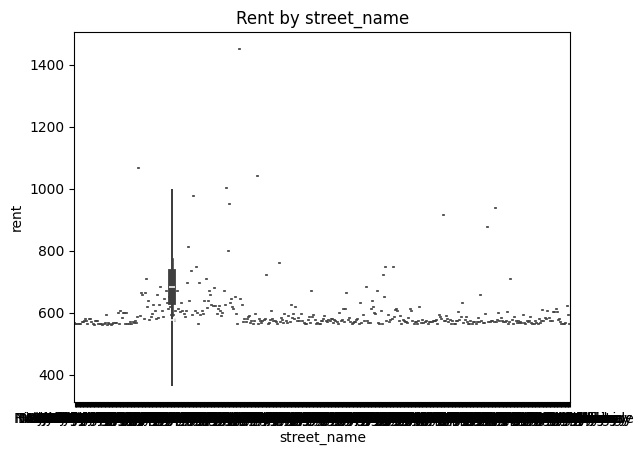

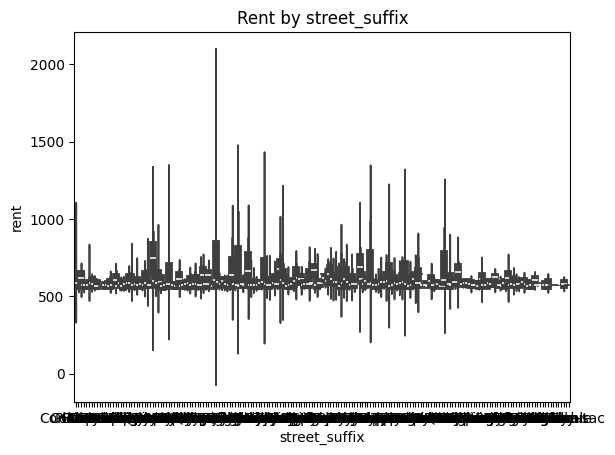

In [41]:
categories =['level', 'secondary_address', 'street_name', 'street_suffix']

for col in categories:

  sns.violinplot(x=col, y='rent', data=validation_df)

  plt.title(f'Rent by {col}')

  plt.show()

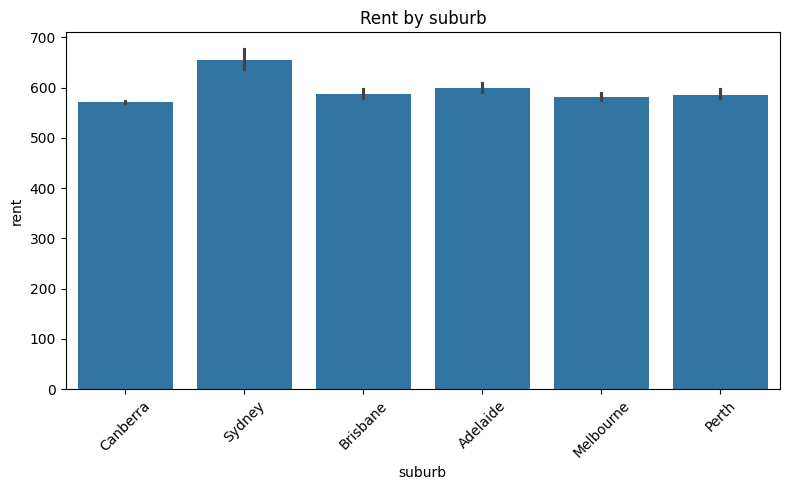

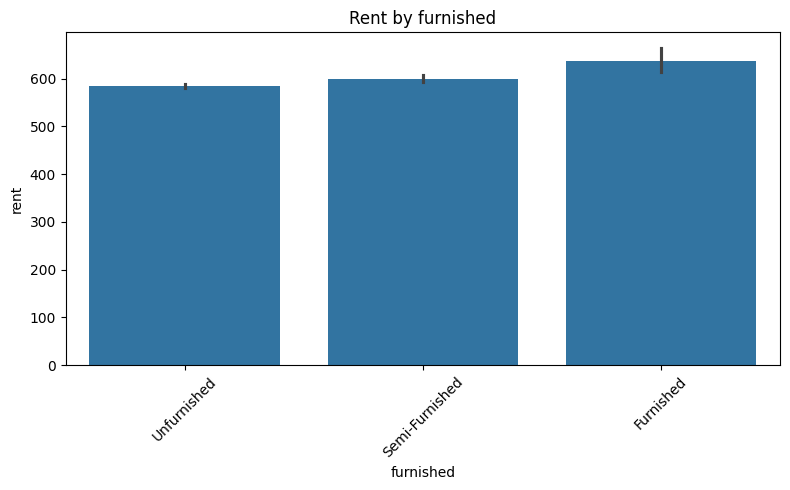

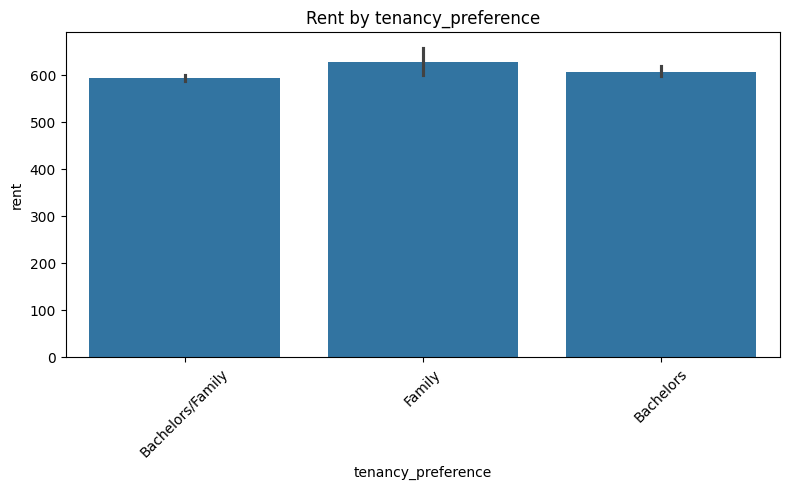

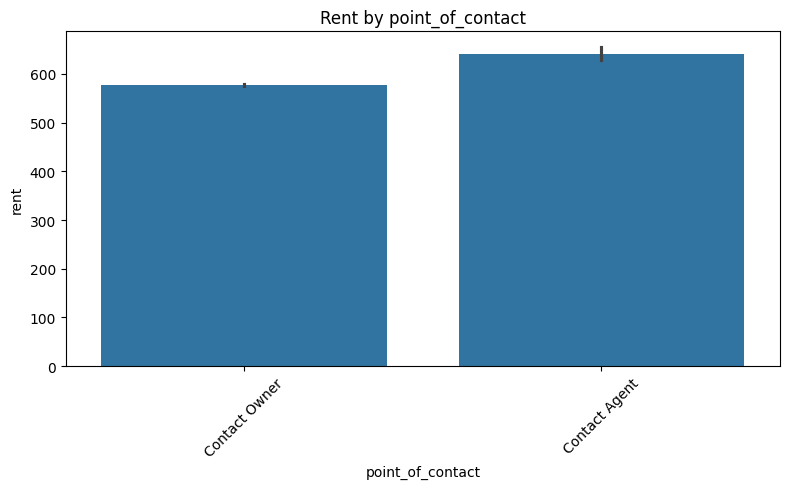

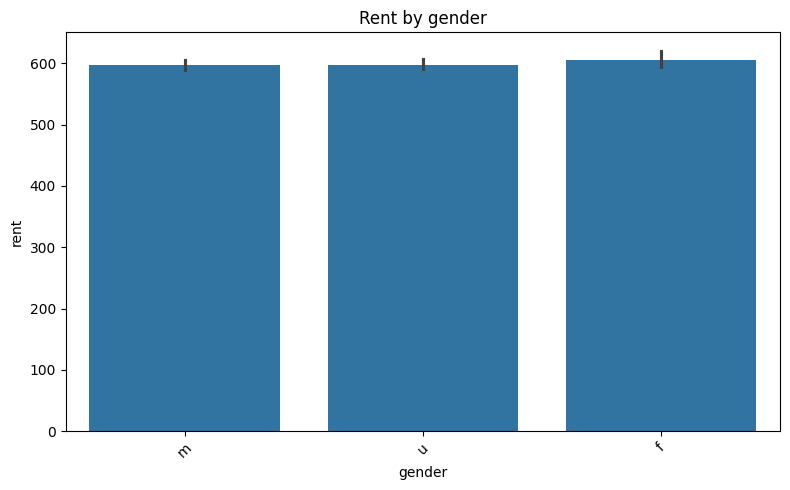

In [174]:
categories = [ 'suburb','furnished', 'tenancy_preference', 'point_of_contact',  'gender']


for col in categories:

    plt.figure(figsize=(8, 5))

    sns.barplot(x=col, y='rent', data=validation_df)

    plt.title(f"Rent by {col}")

    plt.xticks(rotation=45)

    plt.tight_layout()

    plt.show()


#prefix, fist_name, last_name, phone_number, email is not significant to see the relationship.


Earliest: 2022-06-27 00:00:00
Latest: 2022-07-05 00:00:00

Total unique months: 2

Months in data: <PeriodArray>
['2022-06', '2022-07']
Length: 2, dtype: period[M]

monthly_counts advertised_date
2022-06    334
2022-07    300
Freq: M, Name: count, dtype: int64


<Axes: title={'center': 'Ad count per month (Validation)'}, xlabel='advertised_date'>

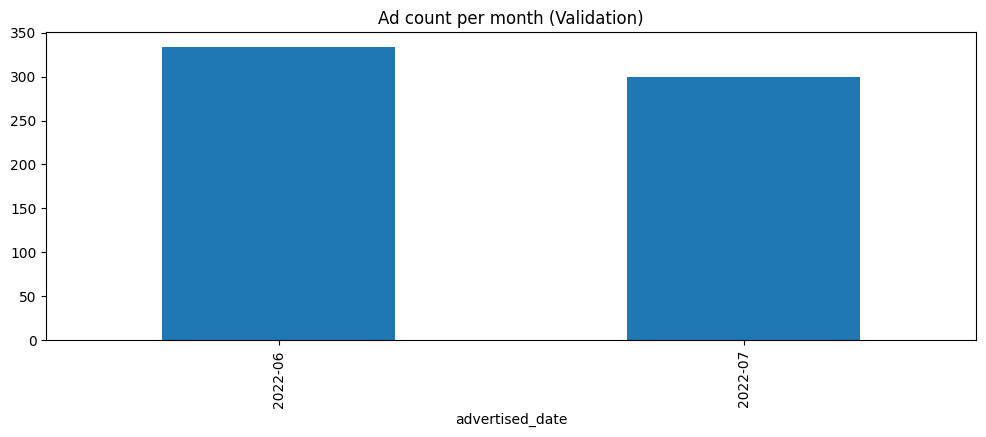

In [175]:
# understanding advertised date

validation_df['advertised_date'] = pd.to_datetime(validation_df['advertised_date'])

print("\nEarliest:", validation_df['advertised_date'].min())
print("Latest:", validation_df['advertised_date'].max())

month_range = validation_df['advertised_date'].dt.to_period('M')
total_months = month_range.nunique()
print("\nTotal unique months:", total_months)

unique_months = validation_df['advertised_date'].dt.to_period('M').sort_values().unique()
print("\nMonths in data:", unique_months)

monthly_counts = validation_df['advertised_date'].dt.to_period('M').value_counts().sort_index()
print('\nmonthly_counts', monthly_counts)

monthly_counts.plot(kind='bar', figsize=(12,4), title="Ad count per month (Validation)")


To Remove the 686 duplicate rows from the validation data set

In [63]:
# @title Validation Set Insights

wgt_eda_validation_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Validation Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_validation_set_insights

Textarea(value='', description='Validation Set Insights:', layout=Layout(height='100%', width='auto'), placeho…

### C.4 Explore Testing Set



In [176]:
testing_df.head()

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
0,2022-06-13,2,571.0,560,Ground out of 1,Melbourne,Semi-Furnished,Family,2,Contact Owner,Level 1,1,Baldwin Towers,Footway,NaN,Jay,Glover,u,(03)08687820,brettkennedy@example.net
1,2022-06-04,2,683.0,750,Upper Basement out of 30,Sydney,Unfurnished,Bachelors/Family,2,Contact Agent,1/,31,Cox Fire Track,Lookout,Dr.,Danielle,Tran,f,(03)-0313-6072,dana35@example.net
2,2022-04-29,3,574.0,950,Ground out of 3,Adelaide,Unfurnished,Bachelors/Family,2,Contact Owner,Unit 37,89,Davidson Ground,Part,NaN,Ashley,Pacheco,u,08-9358-6662,justin89@example.org
3,2022-05-18,1,565.0,500,2 out of 2,Sydney,Semi-Furnished,Bachelors,1,Contact Owner,16/,82,Fitzpatrick Key,Heights,NaN,Victoire,Weber,u,(02).9817.8199,pruittmichael@example.net
4,2022-04-28,2,565.0,600,2 out of 3,Brisbane,Semi-Furnished,Bachelors/Family,2,Contact Owner,Flat 64,9,Heidi Access,Mews,Mrs.,Kerry,Koch,f,4124.0210,hansendiana@example.com


In [177]:
testing_df.shape

(1364, 20)

In [178]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1364 non-null   object 
 1   number_of_bedrooms   1364 non-null   int64  
 2   rent                 1364 non-null   float64
 3   floor_area           1364 non-null   int64  
 4   level                1364 non-null   object 
 5   suburb               1364 non-null   object 
 6   furnished            1364 non-null   object 
 7   tenancy_preference   1364 non-null   object 
 8   number_of_bathrooms  1364 non-null   int64  
 9   point_of_contact     1364 non-null   object 
 10  secondary_address    1364 non-null   object 
 11  building_number      1364 non-null   int64  
 12  street_name          1364 non-null   object 
 13  street_suffix        1364 non-null   object 
 14  prefix               877 non-null    object 
 15  first_name           1364 non-null   o

To Remove the 686 duplicate rows from the training data set


In [179]:
testing_df_filtered = pd.concat([testing_df, unique_duplicates, unique_duplicates]).drop_duplicates(keep=False)
print('shape:', testing_df_filtered.shape)


#Checking to see if all the duplicates are removed
before = testing_df.shape[0]
after = testing_df_filtered.shape[0]
print("\nRows removed:", before - after)

shape: (678, 20)

Rows removed: 686


In [180]:
testing_df = testing_df_filtered.copy()  # Overwrite the original datasets with filtered ones
print('shape:', testing_df.shape)

shape: (678, 20)


In [181]:
testing_df.head()

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
686,2022-07-06,2,566.0,720,4 out of 4,Canberra,Semi-Furnished,Bachelors/Family,2,Contact Owner,5/,4,John Hill,Alley,Mr.,Ryan,Dennis,m,(07).8738.0423,willie03@example.com
687,2022-07-06,2,587.0,1100,2 out of 2,Canberra,Furnished,Bachelors,2,Contact Agent,53/,9,Zachary Track,Foreshore,NaN,Jose,Murillo,u,0489-426-592,joelgarcia@example.net
688,2022-07-06,3,571.0,800,Ground out of 1,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,Flat 58,78,Christopher Artery,Chase,Mrs.,Katie,Bray,f,03.3108.3953,vbauer@example.com
689,2022-07-06,2,564.0,600,Ground out of 2,Canberra,Unfurnished,Bachelors,1,Contact Agent,28/,96,Allison Little,Crossroad,Dr.,Andrew,Espinoza,m,+61-2-9506-3831,rroberts@example.org
690,2022-07-06,3,583.0,1150,1 out of 2,Canberra,Unfurnished,Bachelors/Family,2,Contact Agent,Flat 84,41,Matthew Copse,Hill,NaN,Kristen,Farmer,u,+61-471-890-496,lowerysamantha@example.com


In [182]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 686 to 1363
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      678 non-null    object 
 1   number_of_bedrooms   678 non-null    int64  
 2   rent                 678 non-null    float64
 3   floor_area           678 non-null    int64  
 4   level                678 non-null    object 
 5   suburb               678 non-null    object 
 6   furnished            678 non-null    object 
 7   tenancy_preference   678 non-null    object 
 8   number_of_bathrooms  678 non-null    int64  
 9   point_of_contact     678 non-null    object 
 10  secondary_address    678 non-null    object 
 11  building_number      678 non-null    int64  
 12  street_name          678 non-null    object 
 13  street_suffix        678 non-null    object 
 14  prefix               434 non-null    object 
 15  first_name           678 non-null    objec

In [183]:
testing_df.describe(include ='int64')

,number_of_bedrooms,floor_area,number_of_bathrooms,building_number
count,678.000000,678.000000,678.000000,678.000000
mean,2.333333,1183.398230,2.333333,204.159292
std,0.868509,749.039967,0.941938,297.569134
min,1.000000,30.000000,1.000000,0.000000
25%,2.000000,670.000000,2.000000,6.000000
50%,2.000000,1000.000000,2.000000,45.000000
75%,3.000000,1500.000000,3.000000,314.000000
max,6.000000,7000.000000,6.000000,994.000000


In [184]:
testing_df.describe(include ='object')

,advertised_date,level,suburb,furnished,tenancy_preference,point_of_contact,secondary_address,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
count,678,678,678,678,678,678,678,678,678,434,678,678,678,678,678
unique,6,268,6,3,3,2,432,677,190,5,328,436,3,678,677
top,2022-07-06,1 out of 2,Sydney,Semi-Furnished,Bachelors/Family,Contact Agent,5/,Wells Boulevard,Strand,Mr.,Christopher,Johnson,u,+61.7.2827.0108,gcox@example.net
freq,311,32,235,385,436,424,16,2,9,147,13,13,244,1,2


In [185]:
testing_df.nunique()

,0
advertised_date,6
number_of_bedrooms,6
rent,109
floor_area,244
level,268
suburb,6
furnished,3
tenancy_preference,3
number_of_bathrooms,6
point_of_contact,2


In [186]:
missing_values = testing_df.isnull().sum()  # This returns a Series
missing_columns = missing_values[missing_values  > 0]


print("Columns with missing filtered testing values:")
print(missing_columns )



Columns with missing filtered testing values:
prefix    244
dtype: int64


In [187]:
duplicate_values_testing = testing_df .duplicated().sum()
duplicate_columns_testing = duplicate_values_testing[duplicate_values_testing > 0]

print("Columns with duplicate values in filtereded testing data set:")
print(duplicate_values_testing )

Columns with duplicate values in filtereded testing data set:
0


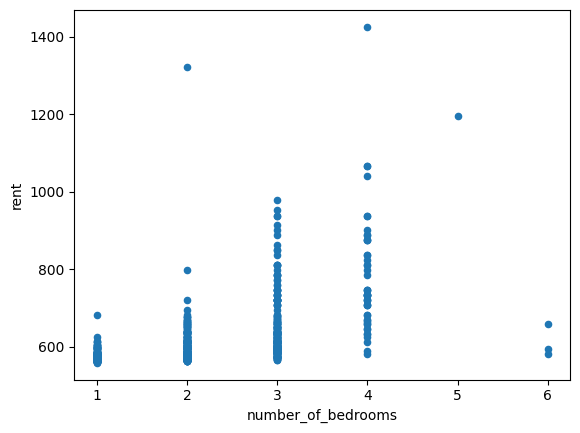

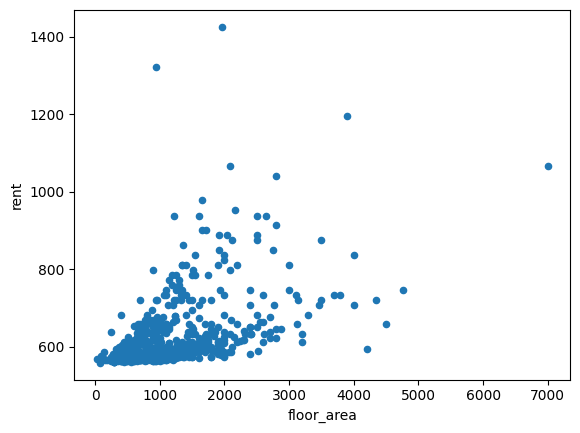

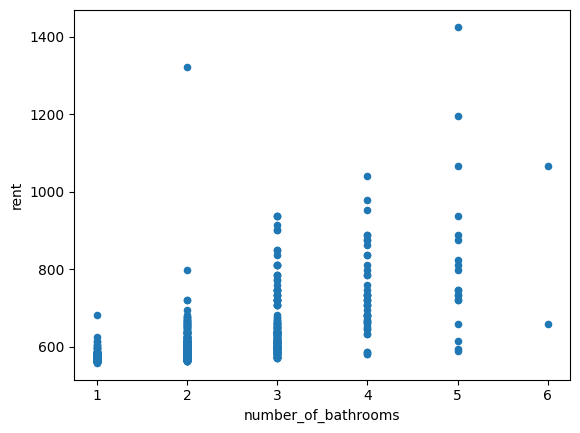

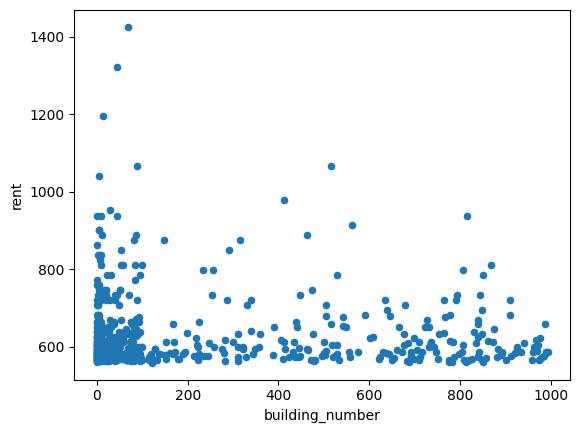

In [188]:
categories = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'building_number']

for col in categories:
  testing_df.plot(x=col, y='rent', kind='scatter')


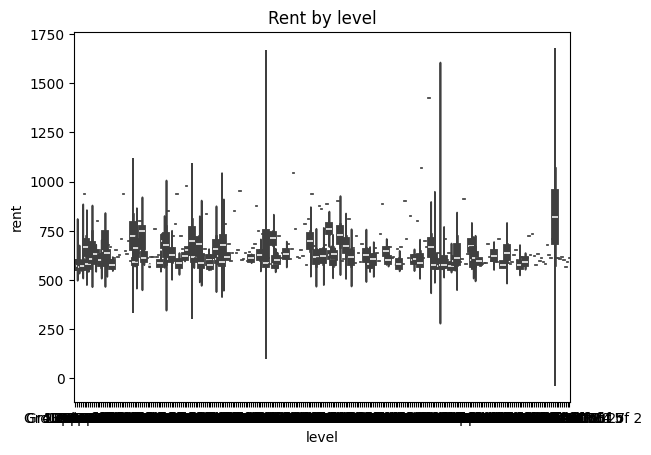

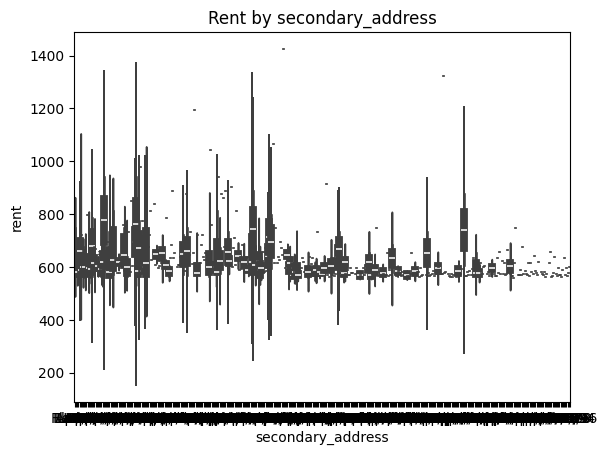

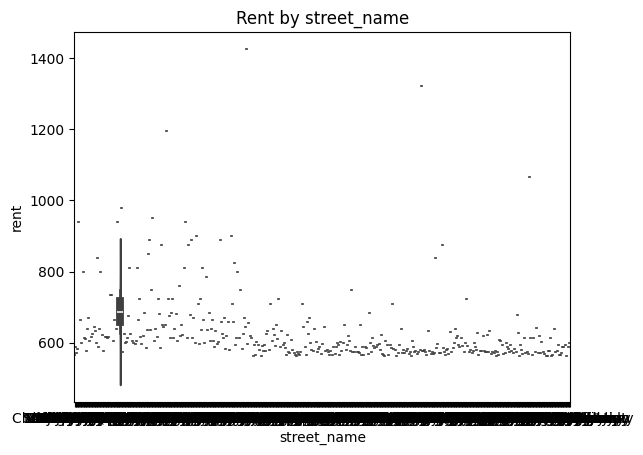

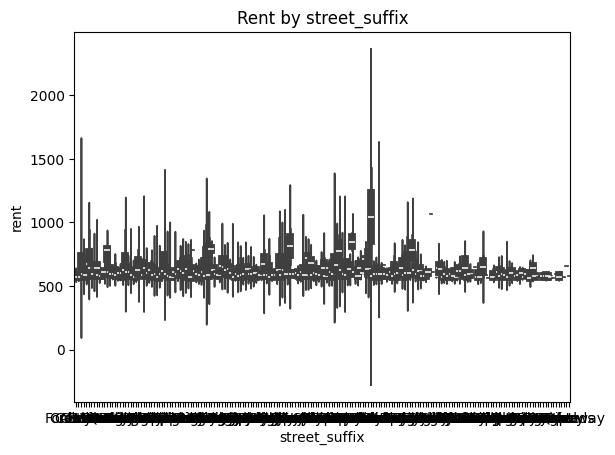

In [58]:
categories =['level', 'secondary_address', 'street_name', 'street_suffix']

for col in categories:
  sns.violinplot(x=col, y='rent', data=testing_df)
  plt.title(f'Rent by {col}')
  plt.show()


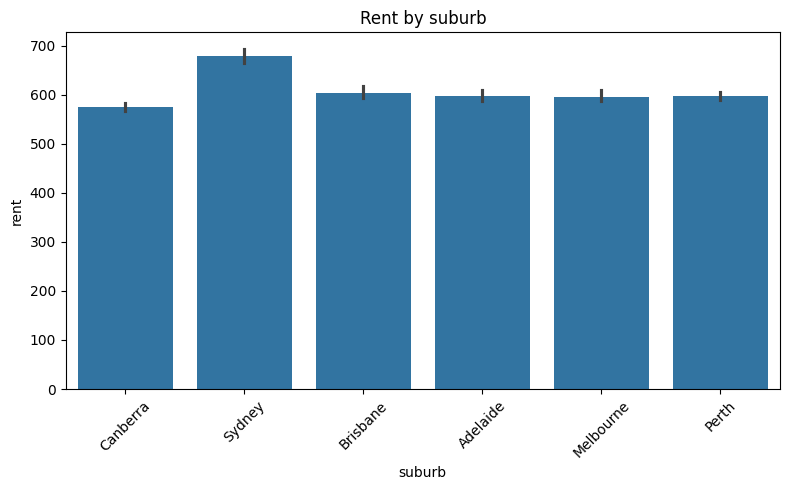

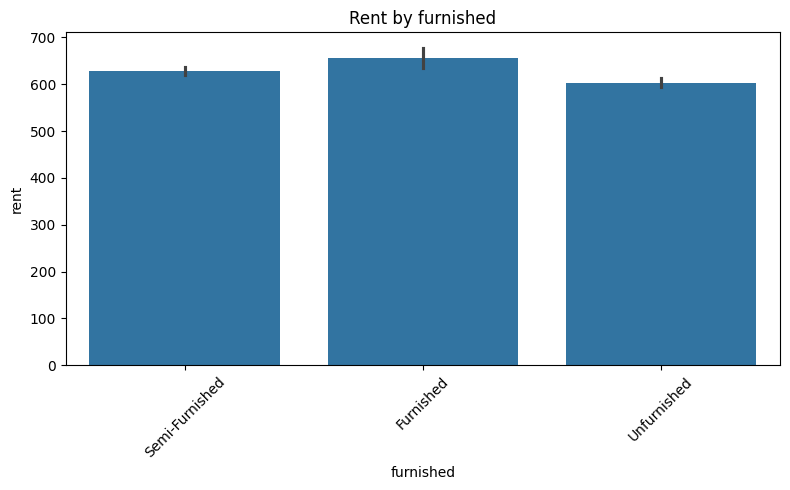

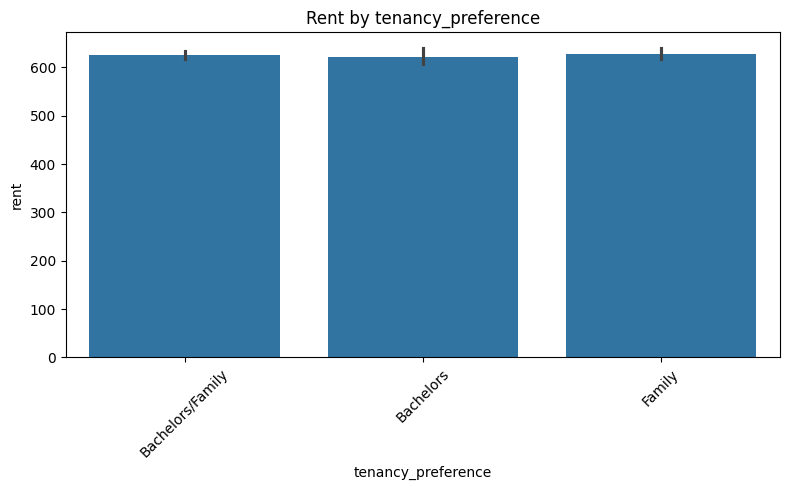

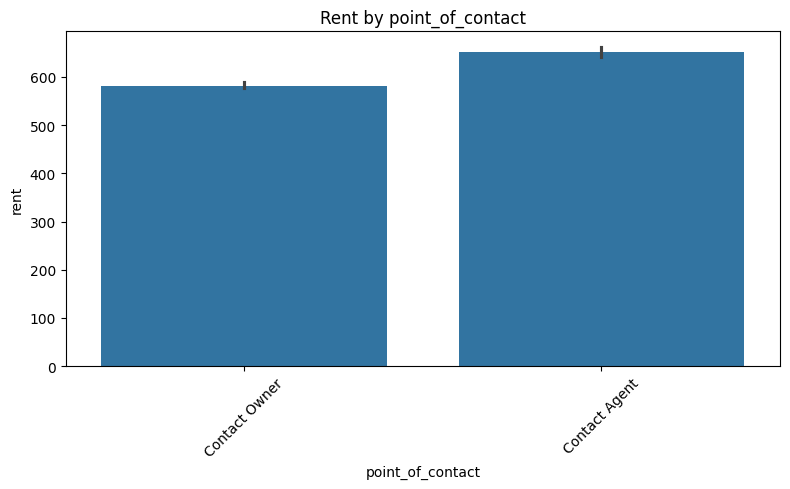

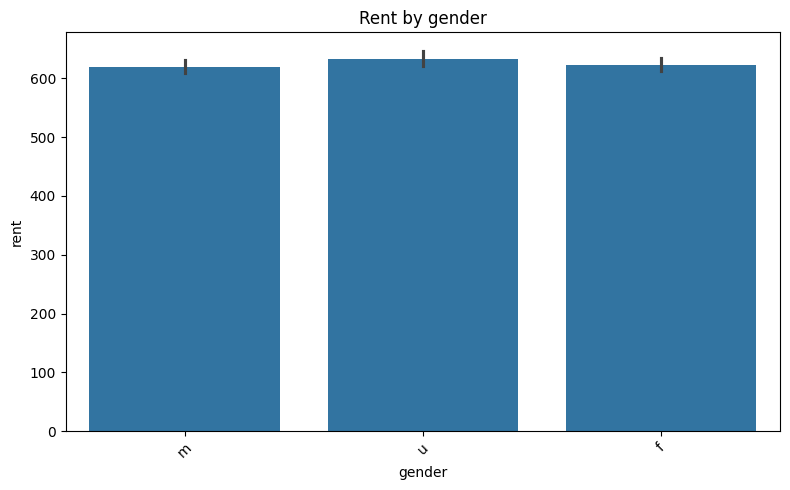

In [189]:
categories = ['suburb','furnished', 'tenancy_preference', 'point_of_contact',  'gender']

for col in categories:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='rent', data=testing_df)
    plt.title(f"Rent by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#prefix, fist_name, last_name, phone_number, email is not significant to see the relationship.


Earliest: 2022-07-06 00:00:00
Latest: 2022-07-11 00:00:00

Total unique months: 1

Months in data: <PeriodArray>
['2022-07']
Length: 1, dtype: period[M]

monthly_counts advertised_date
2022-07    678
Freq: M, Name: count, dtype: int64


<Axes: title={'center': 'Ad count per month (Testing)'}, xlabel='advertised_date'>

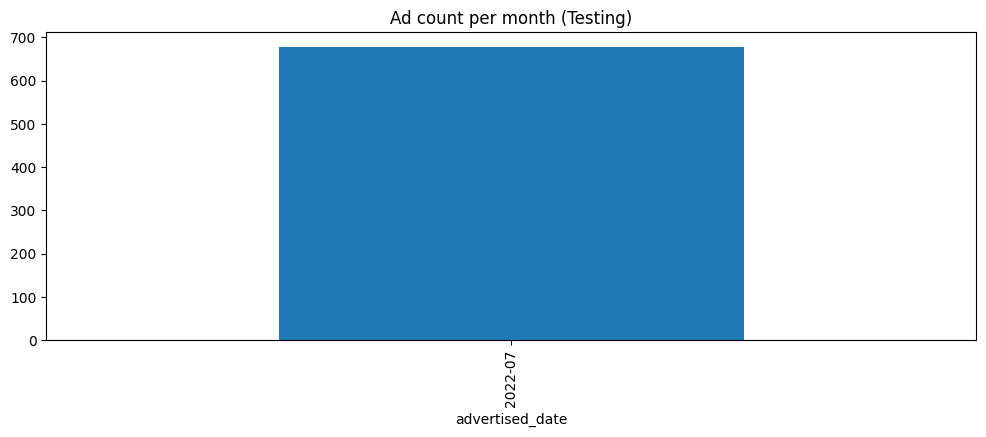

In [190]:
# understanding the advertised date

testing_df ['advertised_date'] = pd.to_datetime(testing_df ['advertised_date'])

print("\nEarliest:", testing_df ['advertised_date'].min())
print("Latest:", testing_df ['advertised_date'].max())

month_range = testing_df ['advertised_date'].dt.to_period('M')
total_months = month_range.nunique()
print("\nTotal unique months:", total_months)

unique_months = testing_df ['advertised_date'].dt.to_period('M').sort_values().unique()
print("\nMonths in data:", unique_months)

monthly_counts = testing_df ['advertised_date'].dt.to_period('M').value_counts().sort_index()
print('\nmonthly_counts', monthly_counts)

monthly_counts.plot(kind='bar', figsize=(12,4), title="Ad count per month (Testing)")


In [61]:
# @title Testing Set Insights

wgt_eda_testing_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Testing Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_testing_set_insights

Textarea(value='', description='Testing Set Insights:', layout=Layout(height='100%', width='auto'), placeholde…

### C.5 Explore Target Variable - rent



In [191]:
target_name = 'rent'

In [192]:
#training data

print(training_df['rent'].describe())

print('\nNO of unique rent data')
training_df['rent'].nunique()



count    3434.000000
mean      595.080664
std       105.380805
min       557.000000
25%       567.000000
50%       574.000000
75%       590.000000
max      5037.000000
Name: rent, dtype: float64

NO of unique rent data


122

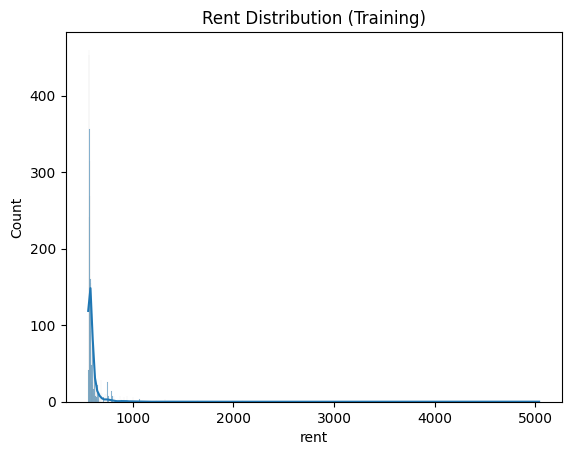

In [193]:
sns.histplot(training_df['rent'], kde=True)
plt.title('Rent Distribution (Training)')
plt.show()

In [194]:
print("Traiing Skewness:", training_df['rent'].skew())
print("Training Kurtosis:", training_df['rent'].kurtosis())

Traiing Skewness: 24.55841195776346
Training Kurtosis: 943.984253581734


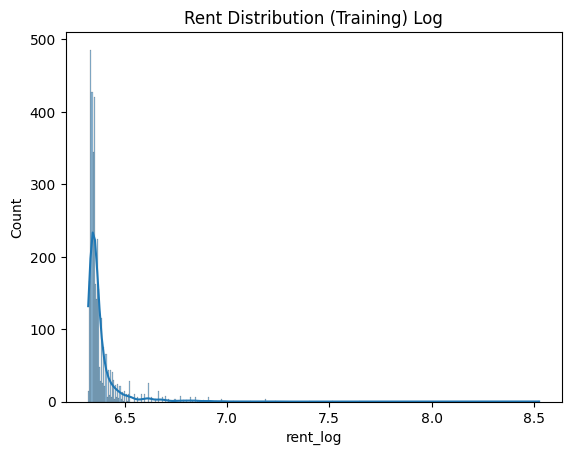

In [195]:
training_df['rent_log'] = np.log(training_df['rent'])

sns.histplot(training_df['rent_log'], kde=True)
plt.title('Rent Distribution (Training) Log')
plt.show()

In [196]:
# validation data

print(validation_df['rent'].describe())

print('\nNO of unique rent data')
validation_df_filtered['rent'].nunique()

count     634.000000
mean      599.556782
std        72.098586
min       559.000000
25%       569.000000
50%       577.000000
75%       600.000000
max      1451.000000
Name: rent, dtype: float64

NO of unique rent data


86

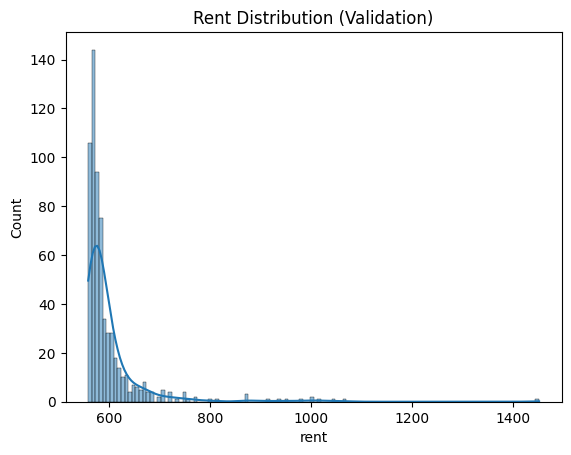

In [197]:
sns.histplot(validation_df['rent'], kde=True)
plt.title('Rent Distribution (Validation)')
plt.show()

In [198]:
print("\nValidation Skewness:", validation_df_filtered['rent'].skew())
print("Validation Kurtosis:", validation_df_filtered['rent'].kurtosis())


Validation Skewness: 5.516445187872007
Validation Kurtosis: 43.145483341713145


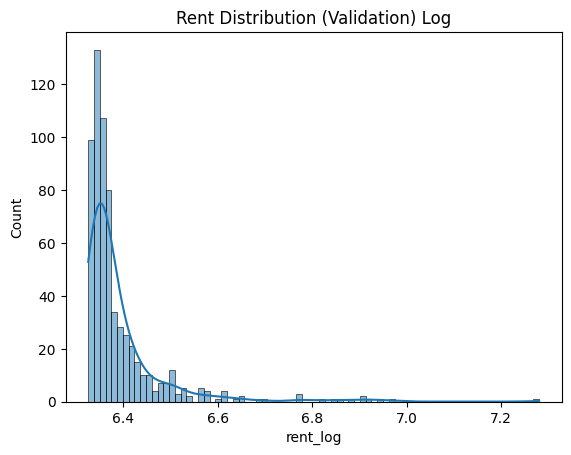

In [199]:
validation_df['rent_log'] = np.log(validation_df['rent'])

sns.histplot(validation_df['rent_log'], kde=True)
plt.title('Rent Distribution (Validation) Log')
plt.show()

In [200]:
print(testing_df['rent'].describe())

print('\nNO of unique rent data')
testing_df['rent'].nunique()



count     678.000000
mean      625.258112
std        90.246011
min       559.000000
25%       574.000000
50%       594.000000
75%       635.750000
max      1426.000000
Name: rent, dtype: float64

NO of unique rent data


109

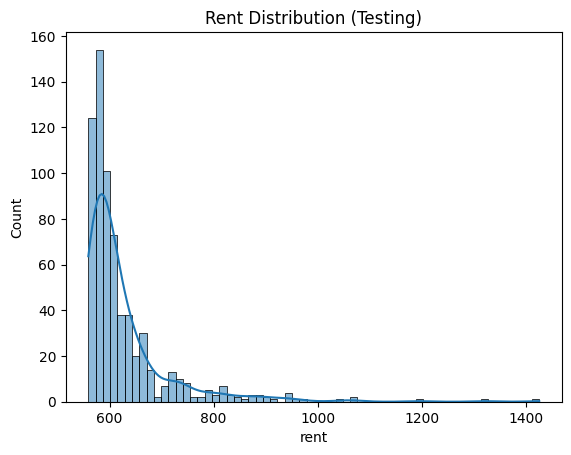

In [201]:
sns.histplot(testing_df['rent'], kde=True)
plt.title('Rent Distribution (Testing)')
plt.show()

In [202]:
print("\nTesting Skewness:", testing_df['rent'].skew())
print("Testing Kurtosis:", testing_df['rent'].kurtosis())


Testing Skewness: 3.6566939717123117
Testing Kurtosis: 19.62801744505254


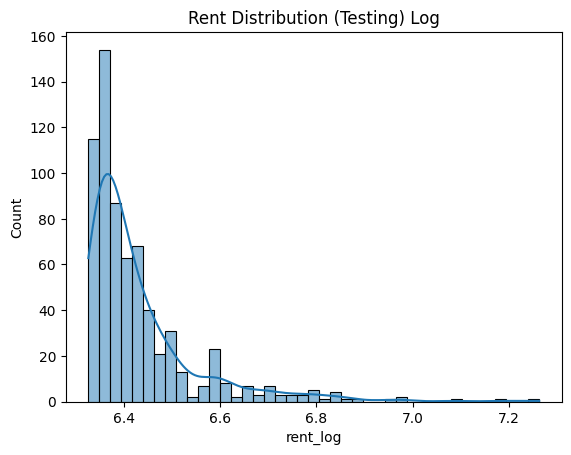

In [203]:
testing_df['rent_log'] = np.log(testing_df['rent'])

sns.histplot(testing_df['rent_log'], kde=True)
plt.title('Rent Distribution (Testing) Log')
plt.show()


In [92]:
# @title Target Variable Insights

wgt_eda_target_variable_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Target Variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_target_variable_insights

Textarea(value='', description='Target Variable Insights:', layout=Layout(height='100%', width='auto'), placeh…

### C.6 Explore Feature of Interest

> You can add more cells in this section

In [77]:
# @title Feature Insights

wgt_eda_feature_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_feature_insights

Textarea(value='', description='Feature Insights:', layout=Layout(height='100%', width='auto'), placeholder='<…

---
## D. Feature Selection


### D.1 Approach 1

In [204]:
# Manual feature Selection

# Features removed [prefix, first_name, last_name, gender, phone_number,  Email, building_number, secondary_address,  street_suffix—]

In [79]:
# @title Feature Selection 1 Insights

wgt_feat_selection_1_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection 1:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_1_insights

Textarea(value='', description='Feature Selection 1:', layout=Layout(height='100%', width='auto'), placeholder…

### D.2 Approach 2

In [205]:
# Model Approach

# Numerical features
numerical_features = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms']


print(" Pearson Correlation with Rent (Numerical Features)")
for feature in numerical_features:
    corr, p_value = stats.pearsonr(training_df[feature], training_df['rent'])
    print(f"{feature}: correlation = {corr:.4f}, p-value = {p_value:.4f}")




 Pearson Correlation with Rent (Numerical Features)
number_of_bedrooms: correlation = 0.3195, p-value = 0.0000
floor_area: correlation = 0.3846, p-value = 0.0000
number_of_bathrooms: correlation = 0.3879, p-value = 0.0000


In [206]:
categorical_features = ['furnished', 'tenancy_preference', 'point_of_contact']

# One-hot encode categorical features
categorical_df = pd.get_dummies(training_df[categorical_features], drop_first=True)
y = training_df['rent']

selector = fs.SelectKBest(score_func=fs.f_regression, k='all')
selector.fit(categorical_df, y)

anova_scores = pd.DataFrame({
    'Feature': categorical_df.columns,
    'F-Score': selector.scores_,
    'P-Value': selector.pvalues_
})

filtered_features = anova_scores[
    (anova_scores['P-Value'] < 0.05) &
    (anova_scores['F-Score'] > 5)
].sort_values(by='F-Score', ascending=False)

display(filtered_features.head(30))

features_list = filtered_features['Feature'].tolist()

X_selected = categorical_df[features_list]


,Feature,F-Score,P-Value
5,point_of_contact_Contact Owner,358.768268,3.532507e-76
1,furnished_Unfurnished,40.046847,2.800219e-10
2,tenancy_preference_Bachelors/Family,20.828541,5.198924e-06
3,tenancy_preference_Family,9.906599,1.660992e-03
0,furnished_Semi-Furnished,6.081552,1.370862e-02


### D.3 Approach 3

In [208]:
# Model Approach - Lasso L1

# Extract level portion (e.g., "Lower Basement", "Upper Basement", "Ground", or number)
training_df['floor_no'] = training_df['level'].str.extract(r'^(Lower Basement|Upper Basement|Ground|\d+)', expand=False)

level_map = {
    'Lower Basement': -2,
    'Upper Basement': -1,
    'Ground': 0
}
training_df['floor_no'] = training_df['floor_no'].replace(level_map)

# Convert numeric levels to float
training_df['floor_no'] = pd.to_numeric(training_df['floor_no'], errors='coerce')

# Extract total number of floors (building size) from strings like "Level 2 of 5"
training_df['building_size'] = training_df['level'].str.extract(r'of\s+(\d+)', expand=False)
training_df['building_size'] = pd.to_numeric(training_df['building_size'], errors='coerce')


training_df['advertised_date'] = pd.to_datetime(training_df['advertised_date'], errors='coerce')  # change the advertised date into the correct format
training_df['days_since_advertised'] = (training_df['advertised_date'] - training_df['advertised_date'].min()).dt.days  # calculate no of days since earliest advertisement


# One-hot encode categorical variables
X_categorical = pd.get_dummies(training_df[['suburb']], drop_first=True)

# Combine all numeric columns
X_numeric = training_df[['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'days_since_advertised','floor_no', 'building_size']]
X4 = pd.concat([X_numeric, X_categorical], axis=1)
X4 = X4.fillna(X4.median())  # To update empty rows with median
print(X4.isnull().sum())
y = training_df.loc[X4.index, 'rent']


print("X4 shape:", X4.shape)
print("y shape:", y.shape)
print("Any NaNs in X4:", X4.isnull().sum().sum())
print("Any NaNs in y:", y.isnull().sum())



number_of_bedrooms       0
floor_area               0
number_of_bathrooms      0
days_since_advertised    0
floor_no                 0
building_size            0
suburb_Brisbane          0
suburb_Canberra          0
suburb_Melbourne         0
suburb_Perth             0
suburb_Sydney            0
dtype: int64
X4 shape: (3434, 11)
y shape: (3434,)
Any NaNs in X4: 0
Any NaNs in y: 0


In [75]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X4, y)


coefficients = pd.Series(lasso_reg.coef_, index=X4.columns)
df_sorted = coefficients.sort_values(key=abs)
print(df_sorted)



floor_area                0.058277
days_since_advertised     0.073613
floor_no                  0.692615
building_size             0.848354
number_of_bedrooms        0.991460
number_of_bathrooms       9.693350
suburb_Brisbane         -13.517165
suburb_Canberra         -14.738913
suburb_Melbourne        -24.373384
suburb_Perth            -34.557469
suburb_Sydney            44.094142
dtype: float64


In [84]:
# @title Feature Selection 2 Insights

wgt_feat_selection_2_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection 2:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_2_insights

Textarea(value='', description='Feature Selection 2:', layout=Layout(height='100%', width='auto'), placeholder…

## D.3 Final Selection of Features



In [211]:
features_list = ['advertised_date', 'number_of_bedrooms','floor_area', 'number_of_bathrooms', 'level', 'suburb', 'rent' ]

In [86]:
# @title Feature Selection Explanation

wgt_feat_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_explanation

Textarea(value='', description='Feature Selection Explanation:', layout=Layout(height='100%', width='auto'), p…

---
## E. Data filtereding

### E.1 Copy Datasets

> Create copies of the datasets and called them `training_df_filtered`, `validation_df_filtered` and `testing_df_filtered`

> Do not change this code

In [212]:
# Create copy of datasets

training_df_clean = training_df[features_list].copy()
validation_df_clean = validation_df[features_list].copy()
testing_df_clean = testing_df[features_list].copy()

### E.2 Fixing - Extracting floor no and building size from level

The level feature is divided into two separate features: floor number and building size.

In [213]:
# Training Data Set

# Extract level portion (e.g., "Lower Basement", "Upper Basement", "Ground", or number)
training_df['floor_no'] = training_df['level'].str.extract(r'^(Lower Basement|Upper Basement|Ground|\d+)', expand=False)

level_map = {
    'Lower Basement': -2,
    'Upper Basement': -1,
    'Ground': 0
}
training_df['floor_no'] = training_df['floor_no'].replace(level_map)

# Convert numeric levels to float
training_df['floor_no'] = pd.to_numeric(training_df['floor_no'], errors='coerce')

# Extract total number of floors (building size) from strings like "Level 2 of 5"
training_df['building_size'] = training_df['level'].str.extract(r'of\s+(\d+)', expand=False)
training_df['building_size'] = pd.to_numeric(training_df['building_size'], errors='coerce')

In [214]:
# Validation Data Set

# Extract level portion (e.g., "Lower Basement", "Upper Basement", "Ground", or number)
validation_df['floor_no'] = validation_df['level'].str.extract(r'^(Lower Basement|Upper Basement|Ground|\d+)', expand=False)

level_map = {
    'Lower Basement': -2,
    'Upper Basement': -1,
    'Ground': 0
}
validation_df['floor_no'] = validation_df['floor_no'].replace(level_map)

# Convert numeric levels to float
validation_df['floor_no'] = pd.to_numeric(validation_df['floor_no'], errors='coerce')

# Extract total number of floors (building size) from strings like "Level 2 of 5"
validation_df['building_size'] = validation_df['level'].str.extract(r'of\s+(\d+)', expand=False)
validation_df['building_size'] = pd.to_numeric(validation_df['building_size'], errors='coerce')

In [215]:
# Testing Data Set

# Extract level portion (e.g., "Lower Basement", "Upper Basement", "Ground", or number)
testing_df['floor_no'] = testing_df['level'].str.extract(r'^(Lower Basement|Upper Basement|Ground|\d+)', expand=False)

level_map = {
    'Lower Basement': -2,
    'Upper Basement': -1,
    'Ground': 0
}
testing_df['floor_no'] = testing_df['floor_no'].replace(level_map)

# Convert numeric levels to float
testing_df['floor_no'] = pd.to_numeric(testing_df['floor_no'], errors='coerce')

# Extract total number of floors (building size) from strings like "Level 2 of 5"
testing_df['building_size'] = testing_df['level'].str.extract(r'of\s+(\d+)', expand=False)
testing_df['building_size'] = pd.to_numeric(testing_df['building_size'], errors='coerce')

In [91]:
# @title Data filtereding 1 Explanation

wgt_data_filtereding_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data filtereding 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_filtereding_1_explanation

Textarea(value='', description='Data filtereding 1 Explanation:', layout=Layout(height='100%', width='auto'), …

### E.3 Fixing - No of days since earliest advertisment listing

The advertisement date is used to calculate the no of days.

In [216]:
# Training Data

training_df['advertised_date'] = pd.to_datetime(training_df['advertised_date'], errors='coerce')  # change the advertised date into the correct format
training_df['days_since_advertised'] = (training_df['advertised_date'] - training_df['advertised_date'].min()).dt.days  # calculate no of days since earliest advertisement

In [217]:
# Validation Data

validation_df['advertised_date'] = pd.to_datetime(validation_df['advertised_date'], errors='coerce')  # change the advertised date into the correct format
validation_df['days_since_advertised'] = (validation_df['advertised_date'] - validation_df['advertised_date'].min()).dt.days  # calculate no of days since earliest advertisement


In [218]:
# Testing Data

testing_df['advertised_date'] = pd.to_datetime(testing_df['advertised_date'], errors='coerce')  # change the advertised date into the correct format
testing_df['days_since_advertised'] = (testing_df['advertised_date'] - testing_df['advertised_date'].min()).dt.days  # calculate no of days since earliest advertisement

In [95]:
# @title Data filtereding 2 Explanation

wgt_data_filtereding_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data filtereding 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_filtereding_2_explanation

Textarea(value='', description='Data filtereding 1 Explanation:', layout=Layout(height='100%', width='auto'), …

###  E.4 Fixing - Encoding for Categorical Feature and Concatenating those with Numerical Features

The dataset is one-hot encoded to convert categorical values into numerical format, making it suitable for modeling.

In [219]:
# Training data

# One-hot encode categorical variables
X_categorical = pd.get_dummies(training_df[['suburb']], drop_first=True)

# Combine all numeric columns
X_numeric = training_df[['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'days_since_advertised','floor_no', 'building_size']]
X4 = pd.concat([X_numeric, X_categorical], axis=1)
X4 = X4.fillna(X4.median())  # To update empty rows with median
print(X4.isnull().sum())
y = training_df.loc[X4.index, 'rent']

number_of_bedrooms       0
floor_area               0
number_of_bathrooms      0
days_since_advertised    0
floor_no                 0
building_size            0
suburb_Brisbane          0
suburb_Canberra          0
suburb_Melbourne         0
suburb_Perth             0
suburb_Sydney            0
dtype: int64


In [220]:
#Validation data

# One-hot encode categorical variables
X_categorical = pd.get_dummies(validation_df[['suburb']], drop_first=True)

# Combine all numeric columns
X_numeric = validation_df[['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'days_since_advertised','floor_no', 'building_size']]
X4 = pd.concat([X_numeric, X_categorical], axis=1)
X4 = X4.fillna(X4.median())  # To update empty rows with median
print(X4.isnull().sum())
y = validation_df.loc[X4.index, 'rent']

number_of_bedrooms       0
floor_area               0
number_of_bathrooms      0
days_since_advertised    0
floor_no                 0
building_size            0
suburb_Brisbane          0
suburb_Canberra          0
suburb_Melbourne         0
suburb_Perth             0
suburb_Sydney            0
dtype: int64


In [221]:
# Testing dataa

# One-hot encode categorical variables
X_categorical = pd.get_dummies(testing_df[['suburb']], drop_first=True)

# Combine all numeric columns
X_numeric = testing_df[['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'days_since_advertised','floor_no', 'building_size']]
X4 = pd.concat([X_numeric, X_categorical], axis=1)
X4 = X4.fillna(X4.median())  # To update empty rows with median
print(X4.isnull().sum())
y = testing_df.loc[X4.index, 'rent']

number_of_bedrooms       0
floor_area               0
number_of_bathrooms      0
days_since_advertised    0
floor_no                 0
building_size            0
suburb_Brisbane          0
suburb_Canberra          0
suburb_Melbourne         0
suburb_Perth             0
suburb_Sydney            0
dtype: int64


In [99]:
# @title Data filtereding 3 Explanation

wgt_data_filtereding_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data filtereding 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_filtereding_3_explanation

Textarea(value='', description='Data filtereding 3 Explanation:', layout=Layout(height='100%', width='auto'), …

---
## F. Feature Engineering

### F.1 Copy Datasets

> Create copies of the datasets and called them `training_df_eng`, `validation_df_eng` and `testing_df_eng`

> Do not change this code

In [222]:
# Create copy of datasets

training_df_eng = training_df_clean.copy()
validation_df_eng = validation_df_clean.copy()
testing_df_eng = testing_df_clean.copy()


In [223]:
# Double Checking the shape to ensure 686 datas are removed from validation, and testing.

print('shape', training_df_eng.shape)
print('shape', validation_df_eng.shape)
print('shape', testing_df_eng.shape)

shape (3434, 7)
shape (634, 7)
shape (678, 7)


### F.2 New Feature - days_since_advertised

This calculates the No. of days since earliest advertisment listing.


In [224]:
# Training Data

training_df['advertised_date'] = pd.to_datetime(training_df['advertised_date'], errors='coerce')  # change the advertised date into the correct format
training_df['days_since_advertised'] = (training_df['advertised_date'] - training_df['advertised_date'].min()).dt.days  # calculate no of days since earliest advertisement

In [225]:
# Validation Data

validation_df['advertised_date'] = pd.to_datetime(validation_df['advertised_date'], errors='coerce')  # change the advertised date into the correct format
validation_df['days_since_advertised'] = (validation_df['advertised_date'] - validation_df['advertised_date'].min()).dt.days  # calculate no of days since earliest advertisement


In [226]:
# Testing Data

testing_df['advertised_date'] = pd.to_datetime(testing_df['advertised_date'], errors='coerce')  # change the advertised date into the correct format
testing_df['days_since_advertised'] = (testing_df['advertised_date'] - testing_df['advertised_date'].min()).dt.days  # calculate no of days since earliest advertisement

In [105]:
# @title Feature Engineering 1 Explanation

wgt_feature_engineering_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_1_explanation

Textarea(value='', description='Feature Engineering 1 Explanation:', layout=Layout(height='100%', width='auto'…

### F.3 New Feature -  floor_no,  building_size

> Extracting floor no and building size from level



In [239]:
# Training Data Set

# Extract level portion (e.g., "Lower Basement", "Upper Basement", "Ground", or number)
training_df['floor_no'] = training_df['level'].str.extract(r'^(Lower Basement|Upper Basement|Ground|\d+)', expand=False)

level_map = {
    'Lower Basement': -2,
    'Upper Basement': -1,
    'Ground': 0
}
training_df['floor_no'] = training_df['floor_no'].replace(level_map)

# Convert numeric levels to float
training_df['floor_no'] = pd.to_numeric(training_df['floor_no'], errors='coerce')

# Extract total number of floors (building size) from strings like "Level 2 of 5"
training_df['building_size'] = training_df['level'].str.extract(r'of\s+(\d+)', expand=False)
training_df['building_size'] = pd.to_numeric(training_df['building_size'], errors='coerce')

# Fill missing building_size with floor_no
training_df['building_size'] = training_df['building_size'].fillna(training_df['floor_no'])

In [240]:
# Validation Data Set

# Extract level portion (e.g., "Lower Basement", "Upper Basement", "Ground", or number)
validation_df['floor_no'] = validation_df['level'].str.extract(r'^(Lower Basement|Upper Basement|Ground|\d+)', expand=False)

level_map = {
    'Lower Basement': -2,
    'Upper Basement': -1,
    'Ground': 0
}
validation_df['floor_no'] = validation_df['floor_no'].replace(level_map)

# Convert numeric levels to float
validation_df['floor_no'] = pd.to_numeric(validation_df['floor_no'], errors='coerce')

# Extract total number of floors (building size) from strings like "Level 2 of 5"
validation_df['building_size'] = validation_df['level'].str.extract(r'of\s+(\d+)', expand=False)
validation_df['building_size'] = pd.to_numeric(validation_df['building_size'], errors='coerce')

In [241]:
# Testing Data Set

# Extract level portion (e.g., "Lower Basement", "Upper Basement", "Ground", or number)
testing_df['floor_no'] = testing_df['level'].str.extract(r'^(Lower Basement|Upper Basement|Ground|\d+)', expand=False)

level_map = {
    'Lower Basement': -2,
    'Upper Basement': -1,
    'Ground': 0
}
testing_df['floor_no'] = testing_df['floor_no'].replace(level_map)

# Convert numeric levels to float
testing_df['floor_no'] = pd.to_numeric(testing_df['floor_no'], errors='coerce')

# Extract total number of floors (building size) from strings like "Level 2 of 5"
testing_df['building_size'] = testing_df['level'].str.extract(r'of\s+(\d+)', expand=False)
testing_df['building_size'] = pd.to_numeric(testing_df['building_size'], errors='coerce')

In [109]:
# @title Feature Engineering 2 Explanation

wgt_feature_engineering_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 2 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_2_explanation

Textarea(value='', description='Feature Engineering 2 Explanation:', layout=Layout(height='100%', width='auto'…

### F.4 New Feature- X4

> X4 contains all the selected features in numerical format, including categorical variables that have been one-hot encoded.



In [242]:
# Training data

# One-hot encode categorical variables
X_categorical = pd.get_dummies(training_df[['suburb']], drop_first=True)

# Combine all numeric columns
X_numeric = training_df[['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'days_since_advertised','floor_no', 'building_size']]
X4 = pd.concat([X_numeric, X_categorical], axis=1)
X4 = X4.fillna(X4.median())  # To update empty rows with median
print(X4.isnull().sum())
y = training_df.loc[X4.index, 'rent']

number_of_bedrooms       0
floor_area               0
number_of_bathrooms      0
days_since_advertised    0
floor_no                 0
building_size            0
suburb_Brisbane          0
suburb_Canberra          0
suburb_Melbourne         0
suburb_Perth             0
suburb_Sydney            0
dtype: int64


In [243]:
#Validation data

# One-hot encode categorical variables
X_categorical = pd.get_dummies(validation_df[['suburb']], drop_first=True)

# Combine all numeric columns
X_numeric = validation_df[['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'days_since_advertised','floor_no', 'building_size']]
X4 = pd.concat([X_numeric, X_categorical], axis=1)
X4 = X4.fillna(X4.median())  # To update empty rows with median
print(X4.isnull().sum())
y = validation_df.loc[X4.index, 'rent']

number_of_bedrooms       0
floor_area               0
number_of_bathrooms      0
days_since_advertised    0
floor_no                 0
building_size            0
suburb_Brisbane          0
suburb_Canberra          0
suburb_Melbourne         0
suburb_Perth             0
suburb_Sydney            0
dtype: int64


In [244]:
# Testing dataa

# One-hot encode categorical variables
X_categorical = pd.get_dummies(testing_df[['suburb']], drop_first=True)

# Combine all numeric columns
X_numeric = testing_df[['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'days_since_advertised','floor_no', 'building_size']]
X4 = pd.concat([X_numeric, X_categorical], axis=1)
X4 = X4.fillna(X4.median())  # To update empty rows with median
print(X4.isnull().sum())
y = testing_df.loc[X4.index, 'rent']

number_of_bedrooms       0
floor_area               0
number_of_bathrooms      0
days_since_advertised    0
floor_no                 0
building_size            0
suburb_Brisbane          0
suburb_Canberra          0
suburb_Melbourne         0
suburb_Perth             0
suburb_Sydney            0
dtype: int64


In [113]:
# @title Feature Engineering 3 Explanation

wgt_feature_engineering_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_3_explanation

Textarea(value='', description='Feature Engineering 3 Explanation:', layout=Layout(height='100%', width='auto'…

In [246]:
# Re-run feature engineering on df_clean so features are included in df_eng for Section G.

for df in [training_df_clean, validation_df_clean, testing_df_clean]:
    # Extract floor number from 'level'
    df['level_clean'] = df['level'].str.extract(r'^(Lower Basement|Upper Basement|Ground|\d+)', expand=False)
    df['level_clean'] = df['level_clean'].replace({
        'Lower Basement': -2,
        'Upper Basement': -1,
        'Ground': 0
    })
    df['floor_no'] = pd.to_numeric(df['level_clean'], errors='coerce')

    # Extract building size from 'level'
    df['building_size'] = df['level'].str.extract(r'of\s+(\d+)', expand=False)
    df['building_size'] = pd.to_numeric(df['building_size'], errors='coerce')

    # Convert advertised_date to datetime and calculate days since earliest listing
    df['advertised_date'] = pd.to_datetime(df['advertised_date'], errors='coerce')
    df['days_since_advertised'] = (df['advertised_date'] - df['advertised_date'].min()).dt.days


In [247]:
training_df_eng = training_df_clean.copy()
validation_df_eng = validation_df_clean.copy()
testing_df_eng = testing_df_clean.copy()


---
## G. Data Preparation for Modeling

### G.1 Copy Datasets

> Create copies of the datasets and split them into X and y

> Do not change this code

In [248]:
target_name = 'rent'

In [249]:
# Create copy of datasets

X_train = training_df_eng.copy()
X_val = validation_df_eng.copy()
X_test = testing_df_eng.copy()

y_train = X_train.pop(target_name)
y_val = X_val.pop(target_name)
y_test = X_test.pop(target_name)

# G.2 Data Transformation - Log floor_area

> A log transformation was applied to reduce skewness and compress the data range.


In [250]:
# All 3 data set

X_train['log_floor_area'] = np.log1p(X_train['floor_area'])
X_val['log_floor_area'] = np.log1p(X_val['floor_area'])
X_test['log_floor_area'] = np.log1p(X_test['floor_area'])

print(X_train['log_floor_area'].count())
print(X_val['log_floor_area'].count())
print(X_test['log_floor_area'].count())

3434
634
678


In [119]:
# @title Data Preparation 1 Explanation

wgt_data_preparation_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_1_explanation

Textarea(value='', description='Data Preparation 1 Explanation:', layout=Layout(height='100%', width='auto'), …

### G.2 Data Transformation - Scaling using Standardisation

> Standardardisation scaling is used as it handles outliers better.

In [251]:
print(X_train.columns.tolist())


['advertised_date', 'number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'level', 'suburb', 'level_clean', 'floor_no', 'building_size', 'days_since_advertised', 'log_floor_area']


In [252]:
numeric_cols = ['number_of_bedrooms', 'number_of_bathrooms', 'log_floor_area', 'days_since_advertised', 'floor_no', 'building_size']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [122]:
# @title Data Preparation 2 Explanation

wgt_data_preparation_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 2 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_2_explanation

Textarea(value='', description='Data Preparation 2 Explanation:', layout=Layout(height='100%', width='auto'), …

---
## H. Save Datasets

> Do not change this code

In [253]:
# Save training set

X_train.to_csv(folder_path / 'X_train.csv', index=False)
y_train.to_csv(folder_path / 'y_train.csv', index=False)

In [254]:
# Save validation set

X_val.to_csv(folder_path / 'X_val.csv', index=False)
y_val.to_csv(folder_path / 'y_val.csv', index=False)

In [255]:
# Save testing set

X_test.to_csv(folder_path / 'X_test.csv', index=False)
y_test.to_csv(folder_path / 'y_test.csv', index=False)

---
## I. Assess Baseline Model

### I.1 Generate Predictions with Baseline Model

In [256]:
features = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'days_since_advertised', 'floor_no', 'building_size']

In [257]:
X_train = training_df[features]
y_train = training_df["rent"]
X_val = validation_df[features]
y_val = validation_df["rent"]

In [258]:
base_reg = DummyRegressor(strategy='mean')

In [259]:
base_reg.fit(X_train, y_train)


DummyRegressor()

In [260]:
# Predict on validation set
y_preds = base_reg.predict(X_val)


### I.2 Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [261]:
# Calculate errors
mse1 = mse(y_val, y_preds)
mae1= mae(y_val, y_preds)
rmse1 = np.sqrt(mse1)

# Print results
print('Difference between predicted vs validated', (y_preds - y_val).sum())
print('\n')
print('Dummy Regression Model Metrics')
print("\nMean Squared Error (MSE):", mse1)
print("Mean Absolute Error (MAE):", mae1)
print("Root Mean Squared Error (RMSE):", rmse1)

Difference between predicted vs validated -2837.859056493914


Dummy Regression Model Metrics

Mean Squared Error (MSE): 5210.0426639346715
Mean Absolute Error (MAE): 35.26041312611496
Root Mean Squared Error (RMSE): 72.18062526699718


In [93]:
# @title Performance Metrics Explanation

wgt_perf_metrics_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Performance Metrics Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_perf_metrics_explanation

Textarea(value='', description='Performance Metrics Explanation:', layout=Layout(height='100%', width='auto'),…

### I.3 Baseline Model Performance

> Provide some explanations on model performance


In [94]:
# @title Performance Metrics Explanation

wgt_model_performance_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Model Performance Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_model_performance_explanation

Textarea(value='', description='Model Performance Explanation:', layout=Layout(height='100%', width='auto'), p…